# A Brief Introduction to Machine Learning for Engineers 1


This is a rather dense book by *Osvaldo Simeone* which favors readers with solid background in mathematics as the title suggests. In short, its coverage can be described as a subset of *Pattern Recognition and Machine Learning* by Christopher Bishop.

However, it has its moments in terms of being terse, so be prepared to comb through [stack exchange](https://stats.stackexchange.com/) for certain derivations. In this series of posts, brief chapter notes and specific derivation of equations, formulas etc left out for the reader in the book will be explained. Main references are listed below:

- *A Brief Introduction to ML for Engineers* by Osvaldo Simeone
- *Pattern Recognition and Machine Learning* by Chrisopher Bisho
- *Mathematics for Machine Learning* by Marc Peter Deisenroth, A Aldo Faisal, and Cheng Soon Ong (This is a fantastic book for strengthening math background and freely available at [here](https://mml-book.github.io/)

**Note:** Numbering of chapter titles and subtitles is chosen according to the book for making referencing easy.

**Quick Notation:** The most common symbols are shown and the rest will be clarified as introduced.

- Random variables are denoted with roman typeface ${\rm x}$ and their value regular font $x$
- Matrices are denoted with upper case $X$ and random matrices with roman typeface ${\rm X}$
- Vectors are in column form
- $\log$ is base 2 and $ \ln $ is natural logarithm


# 1. Introduction

Definition of machine learning given by [mahtematicalmonk](http://jwmi.github.io/index.html) such that "algorithms for inferring unknowns from knowns" captures the essence of the field. As the saying goes "thinking is comparing", we can cement our understanding of machine learning by contrasting it with classical engineering: 

Classical engineering approach: Domain knowledge and in-depth analysis $\rightarrow$ math model $\rightarrow$ hand crafted solutions.

ML approach: Train a generic model with substantial amount of data $\rightarrow$ predict result.

Machine learning as a field generally is divided under three topics:

**Supervised Learning:** We have labeled data and main tasks are:
- Classification
- Regression

**Unsupervised Learning:** We have unlabeled data and main tasks are:
- Clustering
- Dimensionality reduction

**Reinforcement Learning:** Predicting optimal decision based on positive or negative feedback.


In addition, learning from data is executed according to following settings:
- **Passive:** Data is given **Active:** Learner can choose the data
- **Offline:** Batch of training examples **Online:** Samples are provided in a stream.

Algorithms in this book are introduced based on the theoretical arguments based on information theoretic performance metrics.

**Note:** I strongly suggest the reader to open up a [kaggle](https://www.kaggle.com/) account, because all jupyter notebooks are publicly published there and can be used easily without any hassle of system specific installments or requirements. 

# A Brief Introduction to Machine Learning for Engineers 2 Part I



# 2. A "Gentle" Introduction Through Linear Regression

Three main learning frameworks namely frequentist, bayesian and minimum description length (MDL) are studied in this chapter. It is is not possible to make inference or generalization without assumptions. Set of all assumptions made by learning algorithm is called **inductive bias**. How to predict according to frequentist and bayesian. MDL considers parsimonious description of data.

## 2.2 Inference

**Inference problem setup:** predict random variable ${\rm t}$, observation ${\rm x} = x$ known and $P({\rm t}, {\rm x})$ denotes joint probability distribution.

To define an optimal inference, a loss function is established to curb the deviation between $t$ and $\hat{t}$ (predicted). An important loss function family is as follows:

$$ \ell_{q}~(t,\hat{t}) =  \vert  t - \hat{t}  \vert ^{q} ~~~~ (2.1)$$

Once a loss function is determined, optimal $\hat{t}(x)$ is characterized by minimizing $\ell$.

**Generalization Loss:** This loss measures the performance of our predictor for the whole population.

$$ L_{p}~(\hat{t}) = E_{(x,t)\sim P(x,t)}~~~~[\ell_{q}~(t,\hat{t})]~~~~ (2.2)$$

The solution to this problem is given by optimal predictor:


$$ t^{*}(x) = \underset{\hat{t}}{argmin} ~ E_{t \vert x \sim P(t \vert x)}~~~~[\ell_{q}~(t,\hat{t})  \vert  x]~~~~ (2.3)$$

This is expression is found using law of iterated expectation: $ E_{(x,t)\sim P(x,t)}~~~~[ Y ]= E_{ x \sim P(x)}~~~~[E_{(t  \vert  x )\sim P(t \vert x)}~~~~[ Y  \vert  x]]$ and if we plug $\ell_{q}~(t,\hat{t})$ instead of Y, we obtain (2.3) which is called optimum predictor or Bayes prediction (not used in the book because it leads to confusion).

**Theorem 1:** *If chosen loss function is quadratic loss $\ell_{2} =  \vert t-\hat{t}(x) \vert ^{2}$, then the best predictor is $ t^{*}(x) = E_{(t  \vert  x )\sim P(t \vert x)}~~~~[ t \vert x]$ which is the mean of the conditional probability $P(t \vert x)$.*

Let's show this for the discrete case:

$$ E_{(t  \vert  x )\sim P(t \vert x)}~~~~[ \ell_{2}~(t,\hat{t}(x)) \vert x] = \sum_{t}^{} (t-\hat{t}(x))^{2} P(t \vert x) $$

expanding the quadratic form

$$ = \sum_{t}^{} t^{2}(x) P(t \vert x) - 2 \hat{t}(x) \underset{\text{equal to expected value t \vert x}}{\sum_{t}^{} t P(t \vert x)} + \hat{t}^{2}(x) \underset{\text{equal to 1, prob. axioms}}{\sum_{t}^{} P(t \vert x)} $$

and then taking the derivative w.r.t. $\hat{t}(x)$ and setting it to 0

$$ \frac{d E_{(t  \vert  x )\sim P(t \vert x)}~~~~[ \ell_{2}~(t,\hat{t}(x)) \vert x]}{d\hat{t}(x)} =  0 - 2 \hat{t}(x)  E_{(t  \vert  x )\sim P(t \vert x)}~~~~[ t \vert x] + 2 \hat{t}(x) = 0 $$

$$ \hat{t}(x) = E_{(t  \vert  x )\sim P(t \vert x)}~~~~[ t \vert x] ~ \text{ which is the optimum predictor so } \hat{t}(x) = t^{*}(x)$$

Main goal is to come up with a predictor $ \hat{t} $ yielding a performance $L_{p}~(\hat{t})$ as close as possible to $L_{p}~(t^{*}(x))$. Nevertheless one should note that $p(x,t)$ is generally not known and this formulation of the problem applies to frequentist approach.

## 2.3 Frequentist framework:
This framework assumes that parameters exist and are constant. Also data points are drawn from an unknown underlying distribution such as $P(x,t)$ with independent identically distributed (i.i.d. assumption):

$$ ({\rm t_{n}}, {\rm x_{n}}) \underset{i.i.d.}{\sim} P(x,t), i=1...N$$



Since $P(x,t)$ is unknown two different approaches are :

- **Separate learning and inference:** Learn $P_{D}~(t \vert x)$ an approximation to $P(t \vert x)$ from data set $D$ and then plug this to (2.3).

$$ \hat{t}_{D}~(x) = \underset{\hat{t}}{argmin}~E_{t \vert x \sim P_{D}~(t \vert x)}~~~~[\ell_{q}~(t,\hat{t})  \vert  x]~~~~ (2.6)$$

- **Direct inference:** Empirical Risk Minimization (ERM) technique. Learn directly an approximation $\hat{t}~(x)$ of the optimal decision rule by minimizing an empirical estimate

$$ \hat{t}_{D} = \underset{\hat{t}}{argmin} L_{D}~(\hat{t})~~~~ (2.7)$$

Where empirical risk or empirical loss $L_{D}~(\hat{t})$ defined as:

$$ L_{D}~(\hat{t}) = \frac{1}{N} \sum_{n=1}^{N} \ell_{q}~(t_{n},\hat{t}(x_{n}) $$

First approach is more flexible. If $P_{D}~(t \vert x)$ is a good approximation, then any loss function can be used (of course producing different performances). Second approach is tied to the specific loss function. 


**Linear regression example (page 20):**

*For x and t $P(t,x) = P(t \vert x) P(x)$ is not known but $P(t \vert x) \sim \mathcal{N}~(\sin{(2\pi x)}, 0.1)$ and $x \sim \mathcal{U}~(0,1)$*

Since ${\rm x}$ has a uniform pdf and ${\rm t} \vert {\rm x}$ has a Gaussian pdf  

$$f(x) = 1, ~ f(t \vert x)=\frac{1}{\sqrt{2\pi}0.1} \exp \left(-\frac{1}{2}  \left(\frac{t - \sin{2\pi x}}{0.1}\right)^2 \right) $$

So for a given $ {\rm x}=x_{0}$, our best bet for the prediction of $t$ is setting $\hat{t}~(x_{0}) = \sin{2\pi x_{0}}$ which is the mean of the pdf. However using (2.3) and $\ell_{2}$ loss function, we can derive $\hat{t}(x)$ analytically as follows:

$$ E_{t \vert x \sim P(t \vert x)}~[\ell_{q}~(t,\hat{t})  \vert  x] = E_{t \vert x \sim P(t \vert x)}~[(t-\hat{t})^{2}  \vert  x]$$

$$ = \int (t-\hat{t})^{2} ~ \frac{1}{\sqrt{2\pi}~0.1} \exp \left(-\frac{1}{2}  \left(\frac{t - \sin{2\pi x}}{0.1} \right)^2 \right) ~ dt $$

$$ I = \frac{1}{\sqrt{2\pi}~0.1} \exp \left(-\frac{1}{2}  \left(\frac{t - \sin{2\pi x}}{0.1} \right)^2 \right) $$

$$ E_{t \vert x \sim P(t \vert x)}~[(t-\hat{t})^{2}  \vert  x] = \int t^2 I dt - 2 \hat{t} \int t I dt + \hat{t}^2 \int I dt $$

$ \int t I dt$ is equal to mean which is $\sin{2\pi x}$ and $ \int I dt = 1$, finally expression becomes

$$ E_{t \vert x \sim P(t \vert x)}~[(t-\hat{t})^{2}  \vert  x] = \int t^2 I dt - 2 \hat{t} \sin{2\pi x} + \hat{t}^2 $$

If we take the derivative of the final expression with respect to $\hat{t}$ and set to 0, we can find $\hat{t}$ minimizing the $ E_{t \vert x \sim P(t \vert x)}~[(t-\hat{t})^{2}  \vert  x] $:

$$ \frac{d E_{t \vert x \sim P(t \vert x)}~[(t-\hat{t})^{2}  \vert  x]}{d \hat{t}} = 0 - 2 \sin{2\pi x} + 2 \hat{t} = 0$$

$$ \hat{t} = \sin{2\pi x} $$

Finally, if evaluate $ E_{t \vert x \sim P(t \vert x)}~[(t-\sin{2\pi x})^{2}  \vert  x]$ with plugging in our prediction function, expression coincides with the definition of variance. So naturally, our generalization loss is the variance of $P(t \vert x)$ which is 0.1. 


Summary of two solution approaches to the inference problem:

| Method Components | Direct Inference via ERM | Separate Learning ( $P(t \vert x)$ ) and Inference |
| ---- |----| --- |
| Dataset | $$ D = \{ (x_{1},t_{1}), ..., (x_{N},t_{N}) \}$$ |$$ D = \{ (x_{1},t_{1}), ..., (x_{N},t_{N}) \}$$ 
|Loss function |  $$ \ell_{q}~(t,\hat{t}) $$ | $$ \ell_{q}~(t,\hat{t}) $$ |
|Probability Model |  - | $$ {\rm t} \vert {\rm x} \sim P(t \vert x; \theta)$$ |
| Empirical Loss | $$ \mathcal{L}_{D}~(\hat{t}) = \frac{1}{N} \sum_{n=1}^{N} \ell_{q}~(t_{n},~\hat{t}(x_{n}))$$| -|
|Learning process | by minimizing $ \mathcal{L}_{D}~(\hat{t})$ | by maximizing model probability |


### Discriminative vs generative probabilistic models

**Discriminative model:** To learn the approximation of $P_{D}~(t \vert x)$, we start with a family of parametric distributions which is called hypothesis class. Then using a guiding criteria, predictive function is chosen by evaluation of a metric. In this setting $\hat{t}$ is predictive function and $P(t \vert x;\theta)$ is predictive distribution. Let's model $\hat{t}$ as a polynomial function with adding Gaussian noise

$$ \hat{t} = \mathcal{M}(x,w) = \sum_{j=0}^{M} w_{j} x^{j} = w^{T} \phi(x) $$
$$ \phi(x) = [1 ~ x ~ x^{2} ~ ... ~ x^{M}]^{T} $$

Since mean of $P(t \vert x)$ corresponds to the highest value of pdf in Gaussian distribution

$$ t \vert x \sim \mathcal{N}(\mathcal{M}(x,w), \beta^{-1}) $$

In here, $\beta$ is called precision $ {1}/{\beta} = \sigma^{2}$, so higher precision means lower variance.

**Generative model:** Instead of modeling predictive function, we can directly model the joint distribution $P(x,t \vert \theta)$ which requires stronger assumptions. Once we have learned the distribution from data, we can calculate our optimum predictor (2.6) for any loss function. Nevertheless, if starting assumptions mismatch with ground truth or real underlying distribution, bias issue would be more grave.  

### Model order and model parameters

During the linear regression example two set of parameters are chosen: Degree of polynomial $M$ which is model order or hyperparameter that adjusts the complexity of hypothesis class, and second set is model parameters $P(t\vert x;\theta),~ \theta = (w,\beta)$. It should be noted that we have used a semicolon for $ \theta $ which indicates that it is not a random variable and a model parameter. This distinction is required due to frequentist interpretation and will be clear when we study bayesian framework.   Hypreparameters are learned through validation. Model parameters are determined through learning process.

### Maximum likelihood (ML) learning

Assuming $M$ is fixed, ML chooses the $\theta$ which maximizes the probability of observing $D$. We need to write the problem of $D$ in terms of assumed discriminative model.

$$ P(t_{D}  \vert X_{D}, w, \beta)  = \prod_{j=1}^{N} P(t_{j}  \vert x_{j}; w, \beta) ~~ ~ \text{ data is i.i.d so product of individual pdf's is justified} $$ 

Using Gaussian distribution, we need to maximize the following likelihood function

$$ = \prod_{j=1}^{N} \mathcal{N}(t_{n}  \vert \mathcal{M}(x,w), \beta^{-1}) $$

Since it is easier to work with logarithms (in this case $\ln$)

$$ \ln P(t_{D}  \vert X_{D}, w, \beta) = \ln ~ \left( \prod_{j=1}^{N} \mathcal{N}(t_{n}  \vert \mathcal{M}(x,w), \beta^{-1}) \right)  $$

$$ \ln P(t_{D}  \vert X_{D}, w, \beta) = \ln ~ \left( (\frac{\beta}{\sqrt{2\pi}})^{N} \exp \left(-\frac{1}{2}  \frac{\sum_{n=1}^{N}~(t_{n} - \hat{t})^{2}}{\beta^{-1}} \right) \right)  $$

$$ = \frac{N}{2} \ln( \frac{\beta}{2\pi} ) -\frac{\beta}{2}  \sum_{n=1}^{N}~(t_{n} - \hat{t}(x_{n})^{2} $$

Finally, multiplying the expression above with -2 and dividing by $N$ (algebraic operations with constants doesn't affect an optimization problem), we can turn this problem into a minimization:

$$ - \ln P(t_{D}  \vert X_{D}, w, \beta) = \underset{w, \beta}{min}- \ln( \frac{\beta}{2\pi} ) + \frac{\beta}{N}\sum_{n=1}^{N}~(t_{n} - \hat{t}(x_{n})^{2} ~~~~ (2.15)$$

This expression is called negative log likelihood. By only focusing on w and discarding $\beta$

$$ \mathcal{L_{D}} (w) = \underset{w}{min} \frac{1}{N}\sum_{n=1}^{N}~(t_{n} - \hat{t}(x_{n})^{2} ~~~~ (2.16) $$

Let's remember that we define $ \hat{t} = \mathcal{M}(x,w) = w^{T} \phi(x)$, so we try to find w minimizing $\mathcal{L_{D}} (w)$ which is called training loss and the same as empirical loss used in ERM if $\ell_{q} = \ell_{2}$. 


The ERM problem can be solved in closed form if we define 

$$ t_{D} \in \mathbb{R}^{N} \text{ as a column vector consisting of all t's in } D~ \text{ and } t_{D} = \begin{bmatrix} t_{1} \\ .\\.\\.\\ t_{N} \end{bmatrix}$$

$$ X_{D} \in \mathbb{R}^{NxM} ~ \text{ and } ~ X_{D} = \begin{bmatrix} \phi(x_{1}) \\ .\\.\\.\\ \phi(x_{N}) \end{bmatrix} = \begin{bmatrix} \phi_{0}~(x_{1}) & ... & \phi_{M}~(x_{1}) \\ .\\.\\.\\ \phi_{0}~(x_{N}) & ... & \phi_{M}~(x_{N}) \end{bmatrix} $$

and use these in $\mathcal{L_{D}}~(w)$

$$ \mathcal{L_{D}}~(w) = \frac{1}{N}  \vert  \vert t_{D} - X_{D}~w  \vert  \vert ^{2} = \frac{1}{N} (t_{D} - X_{D}~w)^{T} (t_{D} - X_{D}~w) $$

$$ = \frac{1}{N}~(t_{D}^{T}~t_{D} - t_{D}^{T}~X_{D}~w - w^{T}~X_{D}^{T}~t_{D} + w^{T}~X_{D}^{T}~X_{D}~ w) $$

$$ = \frac{1}{N}~(t_{D}^{T}~t_{D} - \underset{\text{scalar so transpose is the same}}{(t_{D}^{T}~X_{D}~w)^{T}} - w^{T}~X_{D}^{T}~t_{D} + w^{T}~X_{D}^{T}~X_{D}~ w) $$

$$ = \frac{1}{N}~(t_{D}^{T}~t_{D} - 2w^{T}~X_{D}^{T}~t_{D} + w^{T}~X_{D}^{T}~X_{D}~ w) $$

Since our starting expression is convex and has a global extremum, if we take the derivative of the expression above with respect to w and set it to 0:

$$ \frac{\partial \mathcal{L_{D}}~(w)}{\partial w} = 0 - 2 X_{D}^{T}~t_{D} +  (X_{D}^{T}~X_{D} + (X_{D}^{T}~X_{D})^{T})~w = 0$$

For a compact treatment (meaning just a list of identities and formulas) of vector and matrix differentiation please check <a href="http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf" target="blank"> Matrix Cookbook</a>

$$ \text{Since } X_{D}^{T}~X_{D} \text{ is symmetric } = 0 - 2 X_{D}^{T}~t_{D} +  2 X_{D}^{T}~X_{D}~w = 0$$

$$ X_{D}^{T}~X_{D}~w = X_{D}^{T}~t_{D}$$ 

$$ (X_{D}^{T}~X_{D})^{-1} (X_{D}^{T}~X_{D})~w = (X_{D}^{T}~X_{D})^{-1} X_{D}^{T}~t_{D}$$ 

$$ w_{ML} = (X_{D}^{T}~X_{D})^{-1} X_{D}^{T}~t_{D} $$  

The expression $(X_{D}^{T}~X_{D})^{-1} X_{D}^{T} $ is called Moore-Penrose pseudo inverse and denoted with  $ X^{\dagger}$.

After finding the $w_{ML}$, we can plug this value into the negative log likelihood (2.15) and try to find $\beta$ by differentiating w.r.t. $\beta$ and setting it 0

$$ \frac{d (-\ln P(t_{D}  \vert  X_{D}, w, \beta))}{d \beta} = - \frac{1}{\beta}  + \frac{1}{N}\sum_{n=1}^{N}~(t_{n} - \hat{t}(x_{n})^{2} = 0 $$

$$ \frac{1}{\beta_{ML}} = \frac{1}{N}\sum_{n=1}^{N}~(t_{n} - \hat{t}(x_{n})^{2} = \mathcal{L}_{D} (w_{ML}) $$

### Overfitting and underfitting

Choosing right model complexity (model order $M$) for optimum result. In previous example $\phi(x) = [1 ~ x ~ x^{2} ~ ... ~ x^{M}]$ and $ w = [w_{0} ~ ... ~ w{M}]$, therefore setting any $w_{i} = 0$ decreases the model complexity. When $M = 1$ model is not rich enough to capture the data so underfits and $M=9$ model is too complex so overfitting occurs in other words training loss $\mathcal{L}_{D}~(w_{ML})$ is small, however generalization loss $\mathcal{L}_{P}~(w_{ML})$ is large.

When dataset is large comparing to the model parameters, $\mathcal{L}_{D}~(w_{ML})$ provides an accurate measurement for $\mathcal{L}_{P}~(w_{ML})$. If we define $w^{*}$ as follows:

$$w^{*} = \underset{w}{argmin} ~ \mathcal{L}_{P}~(w) ~~~~ (2.21) $$

assuming N is large enough, $w_{ML}$ ~ tends to $w^{*}$. To put it differently, when $N \to \infty ~~ \mathcal{L}_{D}~(w_{ML}) \approx \mathcal{L}_{P}~(w_{ML}) \approx \mathcal{L}_{P}~(w^{*})$

- N is small, overfitting causing estimation error dominates bias caused by small model order
- N is large, harder to overfit, so estimation error is dominated by bias depending on the choice of model order

We can decompose bias and estimation error as follows and let's remember that $t^{*}$ (2.3) is the optimum predictor:

$$ L_{p}~(w_{ML}) = L_{p}~(t^{*}) + \underset{\text{Bias}}{\left[L_{p}~(w^{*}) - L_{p}~(t^{*}) \right]} + \underset{\text{Estimation error}}{\left[L_{p}~(w_{ML}) - L_{p}~(w^{*}) \right]} ~~~~ (2.22) $$

- Increasing N decreases estimation error which means $ L_{p}~(w_{ML}) \approx L_{p}~(w^{*})$. To put is differently model reacher its potential.

- It is clear from (2.22) that increasing N has no effect on bias. Because this is inherent to the model type and model order.

### Validation and testing 

Dataset given for a machine learning task is divided into three:
- **Training set:** Used during learning process for determining model parameters.
- **Validation set:** Used to determine hyperparameters of algorithm, so we don't overfit.
- **Test set:** Used to evaluate overall performance of algorithm after model and hyperparameters are finalized.

Since $L_{p}~(t^{*})$ is not possible to calculate due to the fact that $P(x,t)$ is unknown, we utilize test set to calculate an approximation to $L_{p}~(t^{*})$ by testing values never used before.

### Maximum likelihood `code practice`

- N is the sample size
- $L_{D}~(\hat{t})$ is training loss
- $L_{P}~(\hat{t})$ is generalization loss which is approximated by validation using Root Mean Squared Metric

Observations:

- Notice the difference between $L_{D}~(\hat{t})$ and $L_{p}~(\hat{t})$ for M = 9 and `N=15`. This is a clear sign of overfitting.

- By increasing `N=1000`, it is easy to see that optimum model order $M$ = 5. 

- Even though increasing N helps finding optimum $M$, we are still sampling from a constrained domain meaning $0 \leq x \leq 1$ which doesn't capture the periodic nature of true distribution ($\sin 2 \pi x$). 

- By increasing `domain_range = 2`, we immediately see that our previous optimum $M$ = 5 doesn't yield the best result anymore. $M$ = 7 is the new optimum model order. One interpretation of this phenomenon is that true distribution has more 0 values in the new range, therefore higher degree polynomial is a better fit.

- Takeaway lesson is that in real life situation our sample size is generally constant, so jumping to conclusions just because we are getting good results from validation and test doesn't always mean our model will perform competently in real life.


 Training size: 12 and test size: 3


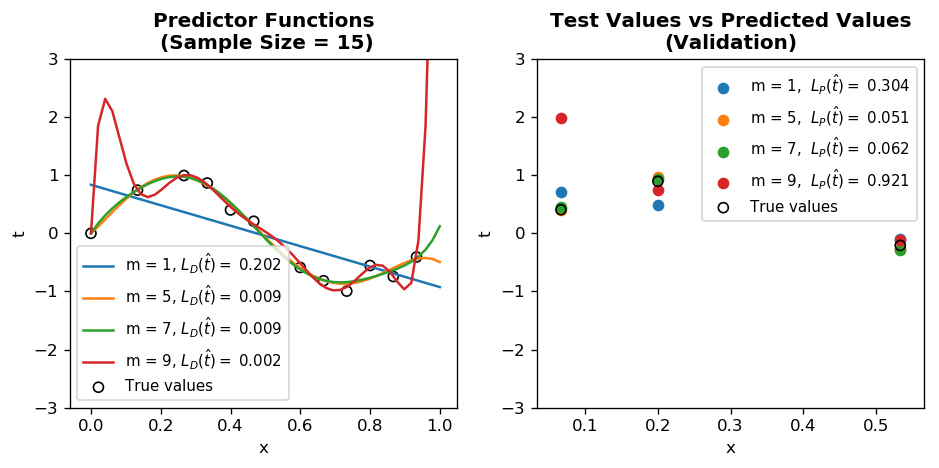

In [5]:
%matplotlib inline 

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, linalg


N = 15  # sample size
M = 9  # model order
domain_range = 1 # range of x values

def t_true(x):
    return np.sin(2 * np.pi * x)


def fi(x, M):
    return np.array([x**i for i in range(0, M + 1)])


def data_generator(N, test_ratio=0.3):
    np.random.seed(42)  # To obtain the same result
    train_ratio = 1 - test_ratio
    limit_index = math.floor(N * train_ratio)
    nonoutlier_ratio = math.ceil(N * 0.7)

    X = np.linspace(0, domain_range, N, endpoint=False)
    nonoutlier_index = np.random.choice(X.shape[0], nonoutlier_ratio, replace=False)
    noise = np.array(stats.norm.rvs(loc=0, scale=0.35, size=N))
    noise[nonoutlier_index] = 0
    t = t_true(X) + noise

    # Randomization of dataset
    index = np.random.choice(X.shape[0], X.shape[0], replace=False)
    X = X[index]
    t = t[index]

    X_test = X[limit_index: None]
    X_train = X[: limit_index]

    t_test = t[limit_index: None]
    t_train = t[: limit_index]

    print(f" Training size: {X_train.shape[0]} and test size: {X_test.shape[0]}")
    return X_train, t_train, X_test, t_test



def design_matrix(X, m):
    Xd = np.array([fi(x, m) for x in X])
    return Xd


def fit_ML(X, t, m):
    Xd = design_matrix(X, m)
    Xpenrose = np.matmul(linalg.inv(np.matmul(Xd.T, Xd)), Xd.T)
    w = np.matmul(Xpenrose, t)
    return w


def predic(w, X_test, m):
    Xd = design_matrix(X_test, m)
    t_predic = np.matmul(Xd, w)
    return t_predic


def rms_calculator(t1, t2):
    """ L_P(t): Generalization loss"""
    
    result = np.sqrt(np.sum((t1 - t2)**2) / len(t1))
    result = round(result, 3)
    return result

def training_loss(t1,t2):
    """ L_D(t): Training loss"""
    result = np.sum((t1 - t2)**2) / len(t1)
    result = round(result, 3)
    return result


X_train, t_train, X_test, t_test = data_generator(N, test_ratio=0.2)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), dpi=120)

for m in [1,5,7,9]:

    w = fit_ML(X_train, t_train, m)
    t_predic = predic(w, X_test, m)
    RMS = rms_calculator(t_test, t_predic)
    L_dt = training_loss(t_train, predic(w, X_train, m) )
    
    x = np.linspace(0, domain_range, 50)
    y = predic(w, x, m)
    ax1.plot(x, y, label=f"m = {m}, " + r"$L_{D}(\hat{t}) = $" + f" {L_dt}")

    ax2.scatter(X_test, t_predic, label=f"m = {m}, " + r" $L_{P}(\hat{t}) = $" + f" {RMS}")
    ax2.set_title(f"Test Values vs Predicted Values\n(Validation)", fontweight="bold")


ax1.set_title(f"Predictor Functions\n (Sample Size = {N})", fontweight="bold")
ax1.set_ylim(-3, 3)
ax1.set_xlabel("x")
ax1.set_ylabel("t")
ax1.scatter(X_train, t_train, label=f"True values", marker="o", facecolor="none", edgecolor="k")
ax1.legend(fontsize=9)

ax2.scatter(X_test, t_test, label="True values", marker="o", facecolor="none", edgecolor="k")
ax2.legend(fontsize=9)
ax2.set_ylim(-3, 3)
ax2.set_xlabel("x")
ax2.set_ylabel("t")
plt.tight_layout()
plt.savefig('ml_results_1.png')
plt.show()
plt.show()


# A Brief Introduction to Machine Learning for Engineers 2 Part II

## 2.3 Frequentist framework:

### Maximum a posteriori (MAP) learning

Model order $M$ dictates the trade off between low bias (high $M$) and low estimation error (low $M$). MAP approach enables refined control over 2 metrcis by assigning a distribution to model parameters. 

For instance observing high capacity model (larger $M$) leads to bigger value model parameters ($w$). We can use this information to limit or distribution to $w$. 

 $$ w \sim \mathcal{N}(0, \alpha^{-1}I), ~~ \alpha \text{ is precision}$$
 
 Rather than maximizing likelihood $ P(t_{D}  \vert  X_{D}, w, \beta)$, we maximize the posteriror distribution:
 
 $$ P(t_{D}, w  \vert  X_{D}, \beta)  = P(w) \prod_{j=1}^{N} P(t_{j}  \vert  x_{j}; w, \beta) $$

Following the same line of argument in maximum likelihood, negative $\ln$ of posterior probability is 

$$ - \ln P(t_{D}, w  \vert  X_{D}, \beta) = - \ln \left(\prod_{j=1}^{N} P(t_{j}  \vert  x_{j}; w, \beta) \right) - \ln(P(w)) $$ 

$$ = - \ln ~ \left( (\frac{\beta}{\sqrt{2\pi}})^{N} \exp \left(-\frac{1}{2}  \frac{\sum_{n=1}^{N}~(t_{n} - \hat{t})^{2}}{\beta^{-1}} \right) \right) - \ln \left( \frac{1}{\sqrt{2\pi} \sqrt{ \vert \alpha^{-1}I} \vert }) \exp \left(-\frac{1}{2} w^{T} (\alpha^{-1} I)^{-1} w \right) \right) $$

First term is the same as in maximum likelihood, so we already know that

$$ = - \frac{N}{2} \ln(~ \frac{\beta}{2\pi}~ ) +\frac{\beta}{2}  \sum_{n=1}^{N}~(t_{n} - \hat{t}(x_{n})^{2} - \frac{1}{2} \ln(~ \frac{\alpha^{M}}{2\pi}~) + \frac{\alpha}{2}  \vert  \vert w \vert  \vert ^{2} $$

and let's unpack derivations in the second term, since w is in fact a multivariate distribution we have to use covariance matrix $\alpha^{-1} I$, nevertheless since it is a diagonal matrix, determinant of it is just the product of its diagonal elements which are equal to $\alpha^{-1}$. In addition, $ w^{T} (\alpha^{-1} I)^{-1} w = \alpha w^{T} w = \alpha  \vert  \vert w \vert  \vert ^{2}$ again due to covariance being diagonal with the same $\alpha^{-1}$ elements.

Finally, disregarding constant terms and dividing the expression by $\beta N / 2$ we get

$$ - \ln P(t_{D}, w  \vert  X_{D}, \beta)  = \underset{w}{min}  \mathcal{L_{D}}~(w) + \frac{\lambda}{N}  \vert  \vert w \vert  \vert ^{2}, ~~~~ (2.27) $$

where $\lambda = \alpha / \beta $ is called regularization constant. An important observation is that when N grows significantly, problem transforms int maximum likelihood. Using the same steps in maximum likelihood, we can also solve this minimization problem analytically. 

$$  = \frac{1}{N}  \vert  \vert t_{D} - X_{D}~w  \vert  \vert ^{2} + \frac{\lambda}{N}  \vert  \vert w \vert  \vert ^{2}= \frac{1}{N} (t_{D} - X_{D}~w)^{T} (t_{D} - X_{D}~w) + \frac{1}{N} w^{T} \lambda I w $$

$$ = \frac{1}{N}~(t_{D}^{T}~t_{D} - t_{D}^{T}~X_{D}~w - w^{T}~X_{D}^{T}~t_{D} + w^{T}~X_{D}^{T}~X_{D}~ w) + \frac{1}{N} w^{T}  \lambda I w$$

$$ = \frac{1}{N}~(t_{D}^{T}~t_{D} - \underset{\text{scalar so transpose is the same}}{(t_{D}^{T}~X_{D}~w)^{T}} - w^{T}~X_{D}^{T}~t_{D} + w^{T}~X_{D}^{T}~X_{D}~ w) + \frac{1}{N} w^{T}  \lambda I w $$

$$ = \frac{1}{N}~[(t_{D}^{T}~t_{D} - 2w^{T}~X_{D}^{T}~t_{D} + w^{T}(X_{D}^{T}~X_{D}~ w)] + \frac{1}{N} w^{T}  \lambda I w  $$

Since our starting expression is convex and has a global extremum, if we take the derivative of the expression above with respect to w and set it to 0:

$$ \frac{\partial \mathcal{L_{D}}~(w) + \frac{\lambda}{N}  \vert  \vert w \vert  \vert ^{2}}{\partial w} =\frac{1}{N}[ 0 - 2 X_{D}^{T}~t_{D} +  (X_{D}^{T}~X_{D} + (X_{D}^{T}~X_{D})^{T})~w + \frac{ 2\lambda I }{N}~w]  = 0$$

$$ \text{Since } X_{D}^{T}~X_{D} \text{ is symmetric } =\frac{1}{N} [0 - 2 X_{D}^{T}~t_{D} +  2 X_{D}^{T}~X_{D}~w  + \frac{ 2\lambda I }{N}~w] = 0$$

$$ X_{D}^{T}~X_{D}~w + \lambda I w = X_{D}^{T}~t_{D}$$ 

$$ (X_{D}^{T}~X_{D} + \lambda I) w = X_{D}^{T}~t_{D}$$ 


$$ (\lambda I + X_{D}^{T}~X_{D})^{-1} (\lambda I + X_{D}^{T}~X_{D})~w = (\lambda I + X_{D}^{T}~X_{D})^{-1} X_{D}^{T}~t_{D}$$ 

$$ w_{MAP} = (\lambda I + X_{D}^{T}~X_{D})^{-1} X_{D}^{T}~t_{D} $$ 

### Regularization

Regularization is used to prevent overfitting and find the optimum model capacity meaning model order M. In previous explanation, it is shown that MAP amounts to ML or ERM with regularization. Furthermore, we can introduce $R(w)$ to ML or ERM independent of probabilistic interpretation. For example we can inspect our training results and conclude that higher $w$ values induce overfitting and use $R(w) = \frac{\lambda}{N}  \vert  \vert w \vert  \vert ^{2} $. For instance, if minimization process sets $w_{m} = w_{m-1} = 0$, then our new model order is $M-2$ which is a hyperparamter tunning.

### Maximum a priori `code practice`

- N is the sample size
- $L_{D}~(\hat{t})$ is training loss
- $L_{P}~(\hat{t})$ is generalization loss which is approximated by validation using Root Mean Squared Metric
- $\lambda$ is regularization constant

Observations:

- `lambd` is the regularization constant and dictates how much our predictor $\hat{t}$ fluctuates. Try `lambd=10**-5` and `lambd=10**-1` to see how it limits the function even for $M=9$

- Even for small sample size `N=15`, MAP prevents overfitting of $M=9$

- When sample size `N=600` and more, ML and MAP start to converge to the same results.



 Training size: 12 and test size: 3


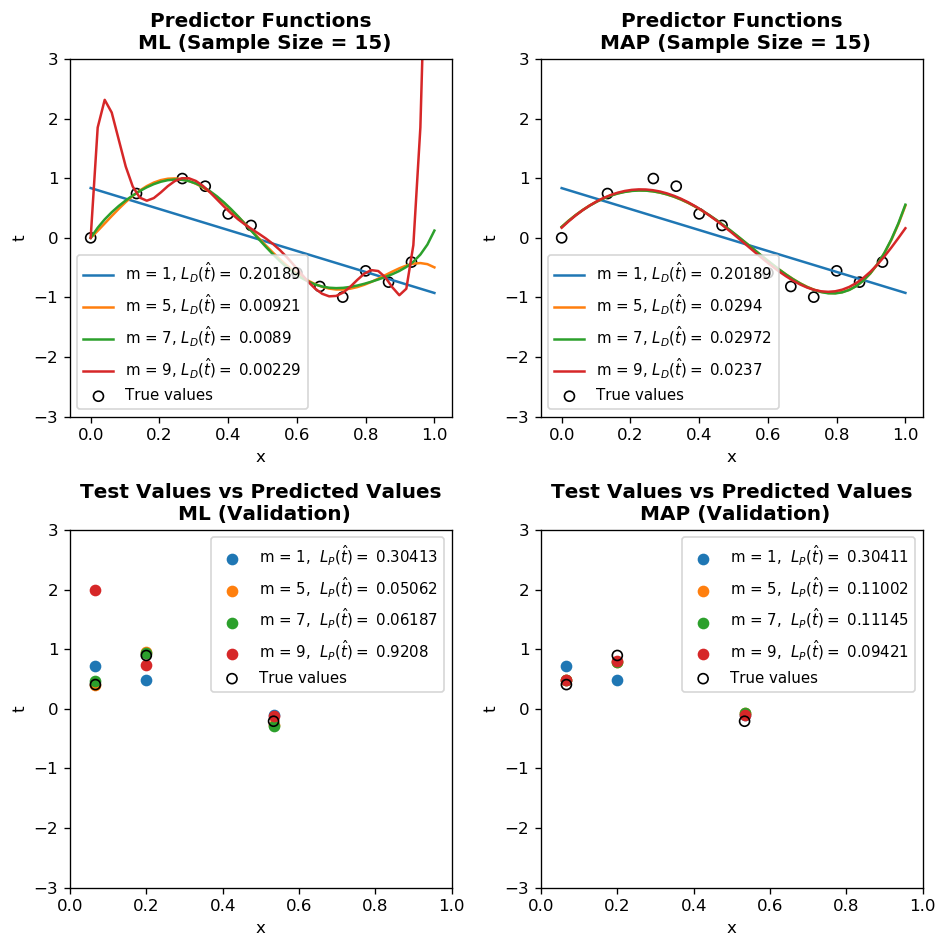

In [63]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, linalg


N = 15  # sample size
M = 9  # model order
domain_range = 1  # range of x values
lambd = 10**-3 # regularization constant

def t_true(x):
    return np.sin(2 * np.pi * x)


def fi(x, M):
    return np.array([x**i for i in range(0, M + 1)])


def data_generator(N, test_ratio=0.3):
    np.random.seed(42)  # To obtain the same result
    train_ratio = 1 - test_ratio
    limit_index = math.floor(N * train_ratio)
    nonoutlier_ratio = math.ceil(N * 0.7)

    X = np.linspace(0, domain_range, N, endpoint=False)
    nonoutlier_index = np.random.choice(X.shape[0], nonoutlier_ratio, replace=False)
    noise = np.array(stats.norm.rvs(loc=0, scale=0.35, size=N))
    noise[nonoutlier_index] = 0
    t = t_true(X) + noise

    # Randomization of dataset
    index = np.random.choice(X.shape[0], X.shape[0], replace=False)
    X = X[index]
    t = t[index]

    X_test = X[limit_index: None]
    X_train = X[: limit_index]

    t_test = t[limit_index: None]
    t_train = t[: limit_index]

    print(f" Training size: {X_train.shape[0]} and test size: {X_test.shape[0]}")

    return X_train, t_train, X_test, t_test


def design_matrix(X, m):
    Xd = np.array([fi(x, m) for x in X])
    return Xd


def fit_map(X, t, m):
    Xd = design_matrix(X, m)    
    Xpenrose = np.matmul(linalg.inv(lambd * np.identity(m + 1) + np.matmul(Xd.T, Xd)), Xd.T)
    w = np.matmul(Xpenrose, t)
    return w

def fit_ml(X, t, m):
    Xd = design_matrix(X, m)
    Xpenrose = np.matmul(linalg.inv(np.matmul(Xd.T, Xd)), Xd.T)
    w = np.matmul(Xpenrose, t)
    return w

def predic(w, X_test, m):
    Xd = design_matrix(X_test, m)
    t_predic = np.matmul(Xd, w)
    return t_predic


def rms_calculator(t1, t2):
    """ L_P(t): Generalization loss"""

    result = np.sqrt(np.sum((t1 - t2)**2) / len(t1))
    result = round(result, 5)
    return result


def training_loss(t1, t2):
    """ L_D(t): Training loss"""
    result = np.sum((t1 - t2)**2) / len(t1)
    result = round(result, 5)
    return result


X_train, t_train, X_test, t_test = data_generator(N, test_ratio=0.2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), dpi=120)

for m in [1, 5, 7, 9]:
    
    w = fit_ml(X_train, t_train, m)
    t_predic = predic(w, X_test, m)
    RMS = rms_calculator(t_test, t_predic)
    L_dt = training_loss(t_train, predic(w, X_train, m))

    x = np.linspace(0, domain_range, 50)
    y = predic(w, x, m)
    
    ax1.plot(x, y, label=f"m = {m}, " + r"$L_{D}(\hat{t}) = $" + f" {L_dt}")
    ax3.scatter(X_test, t_predic, label=f"m = {m}, " + r" $L_{P}(\hat{t}) = $" + f" {RMS}")
    
    

    w = fit_map(X_train, t_train, m)
    t_predic = predic(w, X_test, m)
    RMS = rms_calculator(t_test, t_predic)
    L_dt = training_loss(t_train, predic(w, X_train, m))

    x = np.linspace(0, domain_range, 50)
    y = predic(w, x, m)
    
    ax2.plot(x, y, label=f"m = {m}, " + r"$L_{D}(\hat{t}) = $" + f" {L_dt}")
    ax4.scatter(X_test, t_predic, label=f"m = {m}, " + r" $L_{P}(\hat{t}) = $" + f" {RMS}")
    


ax1.set_title(f"Predictor Functions\n ML (Sample Size = {N})", fontweight="bold")
ax1.set_ylim(-3, 3)
ax1.set_xlabel("x")
ax1.set_ylabel("t")
ax1.scatter(X_train, t_train, label=f"True values", marker="o", facecolor="none", edgecolor="k")
ax1.legend(fontsize=9)

ax3.set_title(f"Test Values vs Predicted Values\n ML (Validation)", fontweight="bold")
ax3.scatter(X_test, t_test, label="True values", marker="o", facecolor="none", edgecolor="k")
ax3.legend(fontsize=9)
ax3.set_xlabel("x")
ax3.set_ylabel("t")
ax3.set_xlim(0, 1)
ax3.set_ylim(-3, 3)

ax2.set_title(f"Predictor Functions\n MAP (Sample Size = {N})", fontweight="bold")
ax2.set_ylim(-3, 3)
ax2.set_xlabel("x")
ax2.set_ylabel("t")
ax2.scatter(X_train, t_train, label=f"True values", marker="o", facecolor="none", edgecolor="k")
ax2.legend(fontsize=9)

ax4.set_title(f"Test Values vs Predicted Values\n MAP (Validation)", fontweight="bold")
ax4.scatter(X_test, t_test, label="True values", marker="o", facecolor="none", edgecolor="k")
ax4.legend(fontsize=9)
ax4.set_xlim(0, 1)
ax4.set_ylim(-3, 3)
ax4.set_xlabel("x")
ax4.set_ylabel("t")
plt.tight_layout()
plt.savefig('map_results_1.png')
plt.show()


# A Brief Introduction to Machine Learning for Engineers 2 Part III

## 2.4 Bayesian framework:

In frequentist framework, there are 2 distributions: true distribution approximated by empirical distribution and model distribution. However, in bayesian framework:
- All data points are jointly distributed
- Model parameters are also jointly distributed

At the end, bayesian framework considers all $\theta$ values weighted with respect to data dependent belief. In short, everything is a random variable.

As a result, we have $P(t_{D},w,t \vert X_{D}, x)$ as a posterior distribution. Given data set and a new point $(\mathcal{D},x)$, $P(t \vert t_{D}, X_{D}, x) = P(t \vert \mathcal{D},x)$ is found using marginalization of $P(t, w, t_{D} \vert X_{D}, x)$.

Using posterior $P(t \vert \mathcal{D},x)$, predictor can be evaluated $\hat{t}$. In a true bayesian framework, we have the explicit formula of the distribution function. By ignoring the domain points, we have

$$ P(t, w, t_{D}) = \underset{\text{prior}}{P(w)} ~~ \underset{\text{likelihood}}{P(t_{D}~ \vert w)} ~~~ \underset{\text{distribution of new data}}{P(t \vert x)} $$

As a clarification, this equation holds due to the conditional independence of $ {\rm t} ~ \vert {\rm w} $ and $ {\rm t_{D}} ~ \vert {\rm w} $ as shown in the Figure 2.7 (book). In words, knowing only parameter w and $t_{D}$ doesn't give information about $t$.

As mentioned our main purpose it to find $ P(t \vert \mathcal{D},x) $ and again dropping data points, we have

$$ P(t \vert T_{D}) = \frac{P(t, T_{D})}{P(T_{D})} = \underset{\text{marginalization}}{\frac{\int P(t,w, T_{D})dw}{P(T_{D})}} = \frac{\int P(t, T_{D} \vert w) P(w) dw }{P(T_{D})} = \underset{\text{Bayes' rule}}{ \frac{\int P(t \vert w) P(T_{D} \vert w) P(w) dw}{P(T_{D})}} = \int P(t \vert w) P(w \vert T_{D}) dw $$

Finally reintroducing the data points, we obtain the key equation which is bayes prediction function

$$ P(t \vert T_{D},x ) = \int P(t \vert x, w) P(w \vert \mathcal{D}) dw $$

Computing the posterior $ P(w \vert \mathcal{D}) $ and predictive distribution $ P(t \vert x, w) $ is a difficult task. Especially in higher dimensions integrating out the model parameters becomes easily intractable. Using Gaussian prior $ \mathcal{N}(w \vert 0, \alpha^{-1}) $, distribution of new data $ \mathcal{N}(t \vert \mathcal{M}(x,w), \beta^{-1}) $ and likelihood $ \prod_{n=1}^{N} \mathcal{N}(t_{n} \vert \mathcal{M}(x,w), \beta^{-1}) $, we can find predictive function distribution as 

$$ {\rm t} \vert {\rm x} \sim \mathcal{N}(t \vert \mathcal{M}(x,w_{MAP}~), S^{2}(x)) ~~~~ (2.36)$$

In this equation, $ S^{2}(x) = \beta^{-1} [ 1 + \phi(x)^{T} ( \lambda I + X_{D}^{T} X_{D})^{-1} \phi(x)] $. However, deriving this equation is an extremely tedious task which also fortifies the claim about the difficulty of integration process. A detailed step by step derivation can be found in mathematicalmonk's videos [here](https://www.youtube.com/watch?v=xyuSiKXttxw) (watching him struggle might also produce a confidence boost). 

### ML and MAP vs bayesian

Comparing the returned distribution of each approach, it is easy to see distinction

- **ML:** $\mathcal{N}(t \vert \mathcal{M}(x,w_{ML}~), \beta^{-1}(x))$
- **MAP:** $\mathcal{N}(t \vert \mathcal{M}(x,w_{MAP}~), \beta^{-1}(x))$
- **Bayesian:** $ \mathcal{N}(t \vert \mathcal{M}(x,w_{MAP}~), S^{2}(x))$, variance changes with w.r.t. x

In bayesian approach, variance changes with given new data point. In addition, as $N \to \infty, S^{2}(x) \to 1 / \beta $



### Bayesian `code practice`

- N is the sample size
- $L_{D}~(\hat{t})$ is training loss
- $L_{P}~(\hat{t})$ is generalization loss which is approximated by validation using Root Mean Squared Metric
- $\lambda$ is regularization constant

Observations:

- `lambd` is the regularization constant and dictates how much our predictor $\hat{t}$ fluctuates. Try `lambd=10**-5` and `lambd=10**-1` to see how it limits the function even for $M=9$

- Even for small sample size `N=15`, MAP prevents overfitting of $M=9$

- When sample size `N=600` and more, ML and MAP start to converge to the same results.



 Training size: 80 and test size: 20
(2, 3)


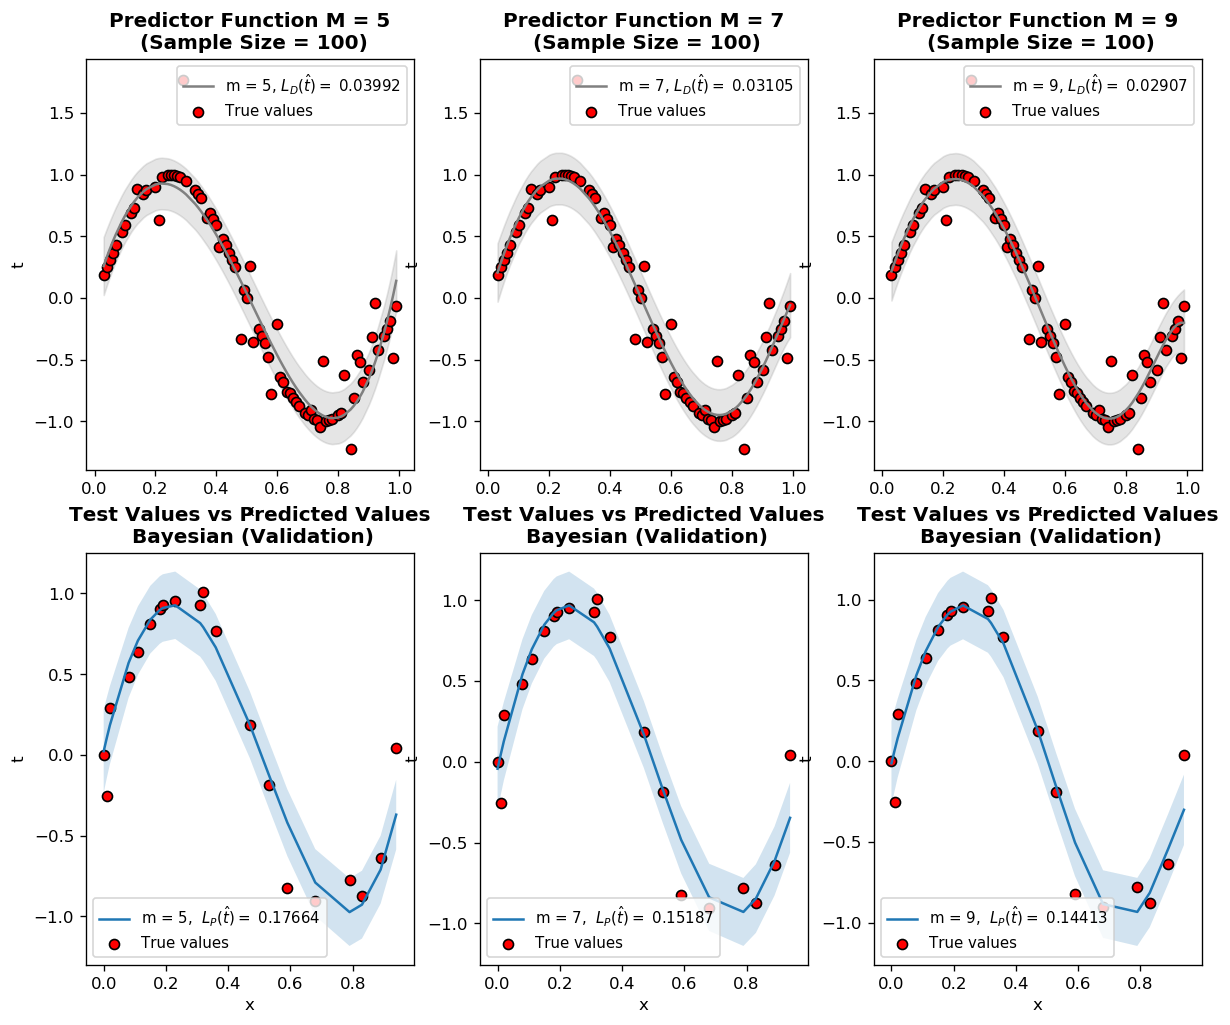

In [60]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, linalg


N = 100  # sample size
M = 9  # model order
domain_range = 1  # range of x values
alpha = 10**-2
beta = 10


def t_true(x):
    return np.sin(2 * np.pi * x)


def fi(x, M):
    return np.array([x**i for i in range(0, M + 1)])


def data_generator(N, test_ratio=0.3):
    np.random.seed(42)  # To obtain the same result
    train_ratio = 1 - test_ratio
    limit_index = math.floor(N * train_ratio)
    nonoutlier_ratio = math.ceil(N * 0.7)

    X = np.linspace(0, domain_range, N, endpoint=False)
    nonoutlier_index = np.random.choice(X.shape[0], nonoutlier_ratio, replace=False)
    noise = np.array(stats.norm.rvs(loc=0, scale=0.35, size=N))
    noise[nonoutlier_index] = 0
    t = t_true(X) + noise

    # Randomization of dataset
    index = np.random.choice(X.shape[0], X.shape[0], replace=False)
    X = X[index]
    t = t[index]

    X_test = X[limit_index: None]
    X_train = X[: limit_index]

    t_test = t[limit_index: None]
    t_train = t[: limit_index]

    print(f" Training size: {X_train.shape[0]} and test size: {X_test.shape[0]}")

    return X_train, t_train, X_test, t_test


def design_matrix(X, m):
    Xd = np.array([fi(x, m) for x in X])
    return Xd


def predic_bayesian(X_train,t_train,m,x):
    
    Xd = design_matrix(X_train, m) 
    Fd = design_matrix(x, m)
    A = linalg.inv((alpha/beta) * np.identity(m + 1) + np.matmul(Xd.T, Xd))
    Xpenrose = np.matmul(A, Xd.T)
    w = np.matmul(Xpenrose, t_train)
    t_predic = np.matmul(Fd, w)    
    
    t_variance = beta**-1 * (1 + np.diagonal(np.matmul(np.matmul(Fd,A) ,Fd.T )))    
    return t_predic, t_variance


def rms_calculator(t1, t2):
    """ L_P(t): Generalization loss"""

    result = np.sqrt(np.sum((t1 - t2)**2) / len(t1))
    result = round(result, 5)
    return result


def training_loss(t1, t2):
    """ L_D(t): Training loss"""
    result = np.sum((t1 - t2)**2) / len(t1)
    result = round(result, 5)
    return result


X_train, t_train, X_test, t_test = data_generator(N, test_ratio=0.2)

# print(X_train, t_train, X_test, t_test)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 10), dpi=120)
print(ax.shape)
count = 0
for m in [5, 7, 9]:
    
    ### Bayesian learning 
    t_predic, t_variance = predic_bayesian(X_train,t_train,m,X_test)
    
    t_predic_train, t_variance_train = predic_bayesian(X_train,t_train,m,X_train)
    
    L_dt = training_loss(t_train, t_predic_train)
    RMS = rms_calculator(t_test, t_predic)
    
    order = np.argsort(X_train)
    
    ax[0][count].plot(X_train[order], t_predic_train[order],\
             '-', color='gray', label=f"m = {m}, " + r"$L_{D}(\hat{t}) = $" + f" {L_dt}")
    ax[0][count].fill_between(X_train[order], t_predic_train[order] - 2*t_variance_train[order], \
                     t_predic_train[order] + 2*t_variance_train[order], color='gray', alpha=0.2)
    
    ax[0][count].set_title(f"Predictor Function M = {m}\n (Sample Size = {N})", fontweight="bold")
    ax[0][count].set_xlabel("x")
    ax[0][count].set_ylabel("t")
    
    order = np.argsort(X_train)
    ax[0][count].scatter(X_train[order], t_train[order], label=f"True values", marker="o", facecolor="r", edgecolor="k")
    ax[0][count].legend(fontsize=9)
    
    
    order = np.argsort(X_test)
    ax[1][count].plot(X_test[order], t_predic[order], '-', label=f"m = {m}, " + r" $L_{P}(\hat{t}) = $" + f" {RMS}")
    ax[1][count].fill_between(X_test[order], t_predic[order] - 2*t_variance[order], \
                     t_predic[order] + 2*t_variance[order], alpha=0.2) 
    
    
    order = np.argsort(X_test)
    ax[1][count].set_title(f"Test Values vs Predicted Values\n Bayesian (Validation)", fontweight="bold")
    ax[1][count].scatter(X_test[order], t_test[order], label=f"True values", marker="o", facecolor="r", edgecolor="k")
    ax[1][count].legend(fontsize=9)
    ax[1][count].set_xlabel("x")
    ax[1][count].set_ylabel("t")
    
    
    count += 1
    

# plt.savefig('map_results_1.png')
plt.show()


### Marginal likelihood

Following formula is named marginal log likelihood

$$ P(t_{D}~ \vert X_{D}) = \int P(w) \prod_{n=1}{N} P(t_{n}~ \vert x_{n},w) dw $$

and this approach enables model selection without validation by including prior information to likelihood process. Calculating the marginal likelihood of running example:

$$ P(t_{D}~ \vert X_{D}) \sim \mathcal{N}(0, \alpha^{-1} X_{D}~X_{D}^{T} + \beta^{-1} I ) $$

Since normalization constant of a Gaussian distribution depends on variance which $alpha^{-1} X_{D}~X_{D}^{T} + \beta^{-1} I$, peak value of $P(t_{D}~ \vert X_{D})$ changes with $\alpha$ and $\beta$ parameters.

Let's go through the whole process. At first, we choose $\alpha, \beta$ and calculate marginal log likelihood $P(t_{D}~ \vert X_{D})$ and choose the $M$ yielding peak value. However, if we graph $P(t_{D}~ \vert X_{D}) $ vs. $M$ with different $ \alpha $ values, it is clear that even though peak $M$ values are similar we cannot exactly pin down the optimum value with only checking a single $ \alpha $. In short, we again have a hyperparameter to tune. As we mentioned earlier, changing $\alpha$ affects variance $alpha^{-1} X_{D}~X_{D}^{T} + \beta^{-1} I$ which changes normalization and consequently peak value of $P(t_{D}~ \vert X_{D}) $.

Finally, assigning priors to $\alpha$ and $M$ also leads to hierarchical models that will be covered in post 7.

### Marginal likelihood `code practice`

- $L_{P}~(\hat{t})$ is generalization loss which is approximated by validation using Root Mean Squared Metric
- $\alpha$ is precision for w 
- $ \beta$ is precision for data points

Observations:

- Change the `alpha=10**-1, 10**-2, 10**-3` and see how optimum model order $M$ changes. 
- Even though optimum model order is the same for constant `alpha`, in certain values such as `alpha=10**-1` and `N=20`, marginal likelihood peaks at different model orders.  



 Training size: 16 and test size: 4


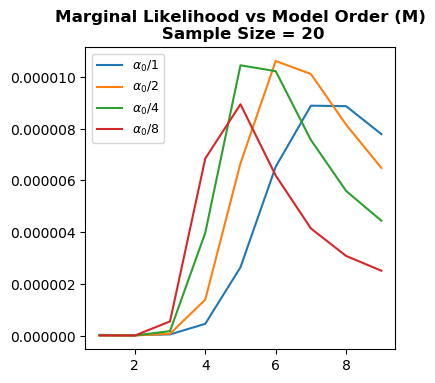

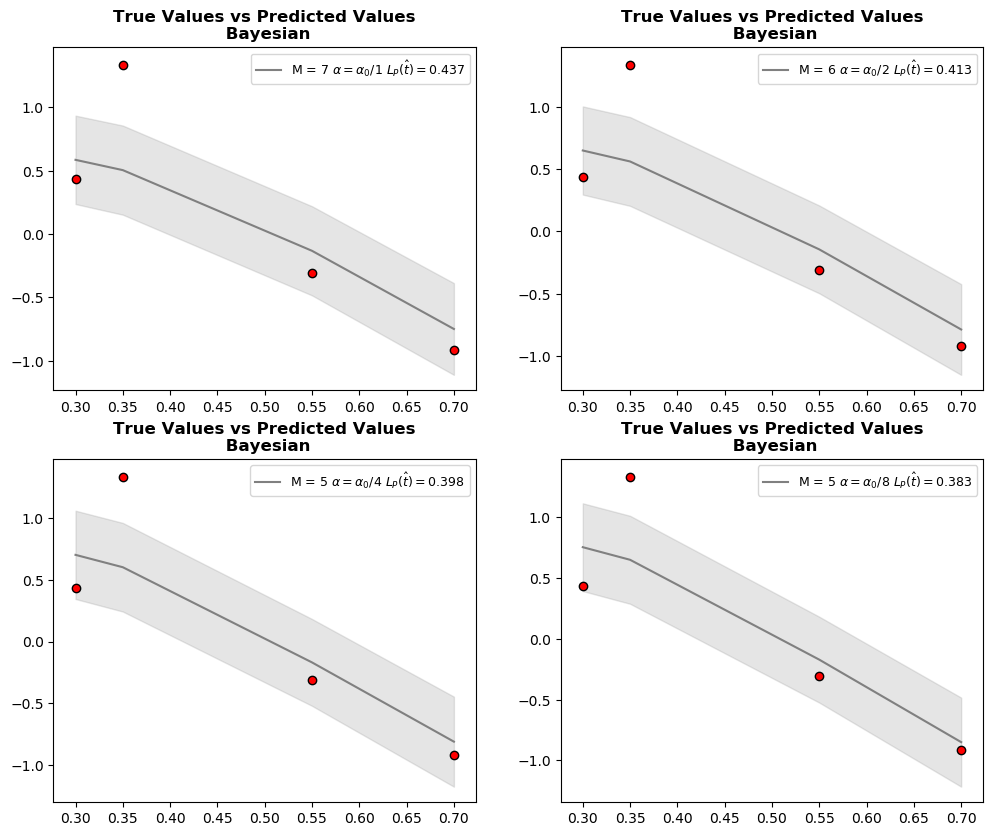

In [13]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, linalg


N = 20  # sample size
M = 9  # model order
alpha = 10**-1
beta = 10
domain_range = 1

def t_true(x):
    return np.sin(2 * np.pi * x)


def fi(x, M):
    return np.array([x**i for i in range(0, M + 1)])


def data_generator(N, test_ratio=0.3):
    np.random.seed(42)  # To obtain the same result
    train_ratio = 1 - test_ratio
    limit_index = math.floor(N * train_ratio)
    nonoutlier_ratio = math.ceil(N * 0.7)

    X = np.linspace(0, domain_range, N, endpoint=False)
    nonoutlier_index = np.random.choice(X.shape[0], nonoutlier_ratio, replace=False)
    noise = np.array(stats.norm.rvs(loc=0, scale=0.35, size=N))
    noise[nonoutlier_index] = 0
    t = t_true(X) + noise

    # Randomization of dataset
    index = np.random.choice(X.shape[0], X.shape[0], replace=False)
    X = X[index]
    t = t[index]

    X_test = X[limit_index: None]
    X_train = X[: limit_index]

    t_test = t[limit_index: None]
    t_train = t[: limit_index]

    print(f" Training size: {X_train.shape[0]} and test size: {X_test.shape[0]}")

    return X_train, t_train, X_test, t_test


def design_matrix(X, m):

    Xd = []
    for x in X:
        Xd.append(fi(x, m))

    Xd = np.array(Xd)
    return Xd

def predic_bayesian(X_train,t_train,m,x):
    
    Xd = design_matrix(X_train, m) 
    Fd = design_matrix(x, m)
    A = linalg.inv((alpha/beta) * np.identity(m + 1) + np.matmul(Xd.T, Xd))
    Xpenrose = np.matmul(A, Xd.T)
    w = np.matmul(Xpenrose, t_train)
    t_predic = np.matmul(Fd, w)    
    
    t_variance = beta**-1 * (1 + np.diagonal(np.matmul(np.matmul(Fd,A) ,Fd.T )))    
    return t_predic, t_variance



def marginal_likelihood(alpha, beta, X):

    result = []
    optimum_M = 0
    mml = 0

    for m in range(1, M + 1):

        Xd = design_matrix(X, m)

        variance = (1 / alpha) * np.matmul(Xd, Xd.T) + (1 / beta) * (np.identity(Xd.shape[0]))
        # variance = np.linalg.inv(variance)
        current_mml = stats.multivariate_normal.pdf(t_train, mean=None, cov=variance)
        if current_mml > mml:
            mml = current_mml
            optimum_m = m
        result.append(current_mml)

    return result, optimum_m


X_train, t_train, X_test, t_test = data_generator(N, 0.2)

fig1, ax = plt.subplots(1,1, figsize=(4,4), dpi=100)

fig2, bx = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), dpi=100)

count = 0

for current_ax in bx.reshape(-1):
    
    alpha = alpha / (2**(count))
    
    result, optimum_m = marginal_likelihood(alpha, beta, X_train)
    
    ax.plot([m for m in range(1, M + 1)], result, label=r"$\alpha_{0}$" + f"/{2**count}")
        
    t_predic, t_variance = predic_bayesian(X_train,t_train,optimum_m,X_test)
    RMS = round(np.sqrt(np.sum((t_test - t_predic)**2) / len(t_predic)), 3)
    
    order = np.argsort(X_test)
    
    current_ax.plot(X_test[order], t_predic[order], color="gray",label=f"M = {optimum_m} " + r"$\alpha = \alpha_{0}$" + f"/{2**count} " + r"$ L_{P}(\hat{t})=$" + f"{RMS}")
    current_ax.fill_between(X_test[order], t_predic[order] - 3*t_variance[order], \
                     t_predic[order] + 3*t_variance[order], color="gray",alpha=0.2)
    
    current_ax.legend(fontsize=9)
    current_ax.set_title("True Values vs Predicted Values\n Bayesian", fontweight="bold")  
    current_ax.scatter(X_test, t_test, label="True distribution", facecolor="r", edgecolor="k")
    
    alpha = alpha * 2**(count)
    count += 1
    
ax.set_title(f"Marginal Likelihood vs Model Order (M)\n Sample Size = {N}", fontweight="bold")
ax.legend(fontsize=9)

plt.show()
